# ==============================
# TASK 7: Basic Sales Summary using SQLite in Python
# ==============================

Load CSV into Pandas and SQLite

In [6]:
import pandas as pd
import sqlite3

# Load CSV into Pandas
df = pd.read_csv("/content/sales_data_cleaned.csv")
# Display first few rows
print("\n Preview of Uploaded Data:")
print(df.head())

# Connect to in-memory SQLite DB
conn = sqlite3.connect(":memory:")

# Write DataFrame to SQLite table
df.to_sql("sales", conn, index=False, if_exists="replace")



 Preview of Uploaded Data:
   product_id   sale_date sales_rep region  sales_amount  quantity_sold  \
0        1052  03-02-2023       Bob  North       5053.97             18   
1        1093  21-04-2023       Bob   West       4384.02             17   
2        1015  21-09-2023     David  South       4631.23             30   
3        1072  24-08-2023       Bob  South       2167.94             39   
4        1061  24-03-2023   Charlie   East       3750.20             13   

  product_category  unit_cost  unit_price customer_type  discount  \
0        Furniture     152.75      267.22     returning      0.09   
1        Furniture    3816.39     4209.44     returning      0.11   
2             Food     261.56      371.40     returning      0.20   
3         Clothing    4330.03     4467.75           new      0.02   
4      Electronics     637.37      692.71           new      0.08   

  payment_method sales_channel region_and_sales_rep  
0           Cash        Online            North-Bob 

1000

Step 4 — SQL Query: Total quantity & revenue by product

In [8]:
query = """
SELECT
    product_id,
    SUM(quantity_sold) AS total_quantity,
    SUM(quantity_sold * unit_price) AS total_revenue
FROM sales
GROUP BY product_id
ORDER BY total_revenue DESC
"""

sales_summary = pd.read_sql_query(query, conn)

print("\nSales Summary Table:")
print(sales_summary)



Sales Summary Table:
    product_id  total_quantity  total_revenue
0         1090             590     1819857.91
1         1092             548     1738987.88
2         1099             502     1635859.89
3         1089             390     1445192.74
4         1054             348     1256881.40
..         ...             ...            ...
95        1065             105      296587.77
96        1041             151      288497.74
97        1011              75      244328.35
98        1031              64      223359.48
99        1043              65      191699.04

[100 rows x 3 columns]


Simple Bar Chart for revenue

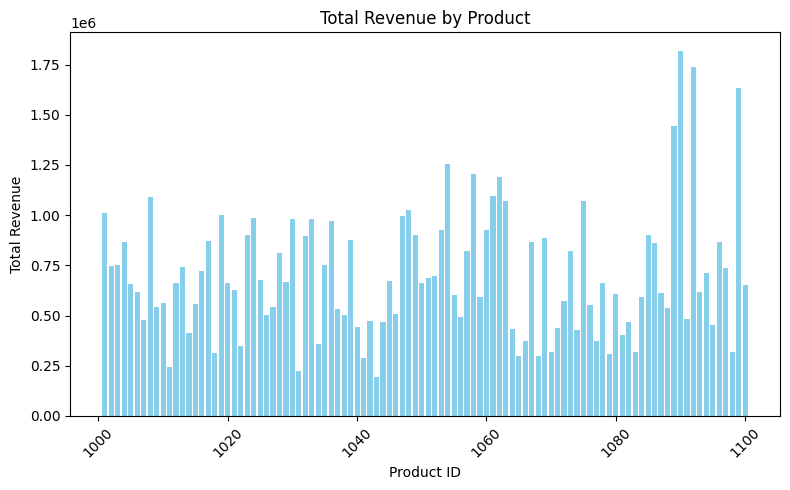

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(sales_summary['product_id'], sales_summary['total_revenue'], color='skyblue')
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
#Save Chart
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>